## Medicare Part D Prescription Data Analysis

By [Andrea Suozzo](https://twitter.com/asuozzo)


Since 2013, the Centers for Medicare & Medicaid Services (CMS) has released [summary data](https://data.cms.gov/browse) on the prescribing habits of medical practitioners for their Medicare Part D patients. As of May 2017, datasets for 2013, 2014 and 2015 are available. CMS also releases an [overview document](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf) with information on data sources and methodology.

To protect patient privacy, the government leaves blank patient and prescription numbers that total 10 or fewer. For our analysis, we filled in blank patient numbers using 5 wherever possible, but removed rows that contained more than one blank field.

This approach eliminated some low-prescribing providers from the dataset, but allowed us to calculate and compare prescribing practices for the program as a whole.

It's also important to note that Medicare Part D prescribing practices may not be representative of the state as a whole; those receiving Medicare are over 65, have a long-term disability or end-stage renal disease. Many, but not all, Medicare recipients have a Part D plan, which covers prescription drugs. At the end of 2015, 90,608 Vermonters — about 14 percent of the state's population — were on a Medicare Part D plan.

This analysis is part of a _Seven Days_ story, [HEADLINE](https://www.sevendaysvt.com), published June 27, 2017.

In [62]:
import pandas as pd
import matplotlib
import pylab
import seaborn as sns
%matplotlib inline

Import processed datasets from data-prep notebook:

In [63]:
%run medicare-prescription-data-prep.ipynb

### Analyzing New England Summary Data

Take a look at whether New England doctors are changing prescribing habits for opioid patients in the Medicare Part D system. By dividing the total day supply and the total claim count by the number of opioid beneficiaries, we can see whether doctors are changing the amounts of opioids they're prescribing to their patients over the years.

In [64]:
nesummary['opioid_days_per_bene'] = nesummary['opioid_day_supply'] / nesummary['opioid_bene_count']
nesummary['opioid_claims_per_bene'] = nesummary['opioid_claim_count'] / nesummary['opioid_bene_count']

nesummary

,year,state,opioid_claim_count,opioid_day_supply,opioid_bene_count,opioid_days_per_bene,opioid_claims_per_bene
0,2013,CT,671688.0,13483063.0,210233.0,64.133904,3.194969
1,2013,MA,1331244.0,27209500.0,429044.0,63.418903,3.102815
2,2013,ME,425795.0,8847778.0,120324.0,73.532944,3.538737
3,2013,NH,293762.0,5770328.0,85815.0,67.241485,3.423201
4,2013,RI,254915.0,4939949.0,76118.0,64.898565,3.348945
5,2013,VT,144746.0,2942171.0,35825.0,82.126197,4.040363
6,2014,CT,687547.0,13901283.0,221220.0,62.839178,3.107978
7,2014,MA,1356186.0,28120422.0,442287.0,63.579581,3.066303
8,2014,ME,427909.0,8978759.0,124874.0,71.902550,3.426726
9,2014,NH,304997.0,6113250.0,89956.0,67.958224,3.390513


Compare the change in how many prescriptions each opioid-receiving patient is receiving from year to year:


*Note: We chose to look primarily at the number of prescriptions per beneficiary, which shows similar trends to the number of days per beneficiary. Change the y value to 'opioid_days_per_bene' in charts that follow to examine those numbers.*

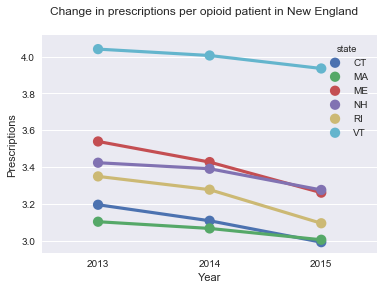

In [65]:
plot = sns.pointplot(x='year',y='opioid_claims_per_bene', hue='state', data=nesummary)
plot.set(xlabel='Year', ylabel='Prescriptions')
sns.plt.suptitle("Change in prescriptions per opioid patient in New England")
fig = plot.get_figure()

# fig.savefig("statebystateclaims20132015.pdf")

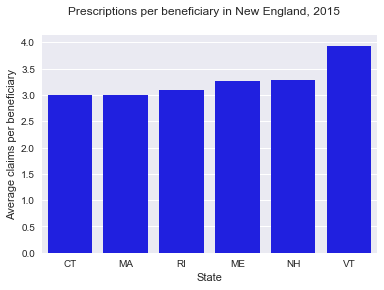

In [66]:
ne2015 = nesummary[nesummary['year'] == 2015].sort_values(by='opioid_claims_per_bene')

ax = sns.barplot(x="state", y="opioid_claims_per_bene", data=ne2015, color="blue")
ax.set(xlabel='State', ylabel='Average claims per beneficiary')
sns.plt.suptitle("Prescriptions per beneficiary in New England, 2015")
fig = ax.get_figure()

# fig.savefig("statebystateclaims2015.pdf")

Pull out Vermont specifically:

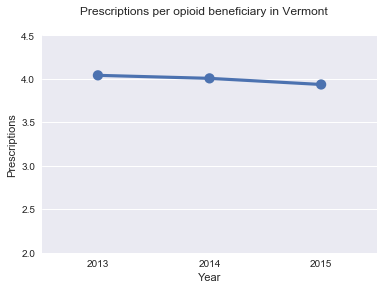

In [67]:
vermontsummary = nesummary[nesummary['state'] == 'VT']

plot = sns.pointplot(x='year',y='opioid_claims_per_bene', data=vermontsummary)
pylab.ylim([2,4.5])
plot.set(xlabel='Year', ylabel='Prescriptions')
sns.plt.suptitle("Prescriptions per opioid beneficiary in Vermont")
fig = plot.get_figure()

# fig.savefig("Vermontclaims20132015.pdf")

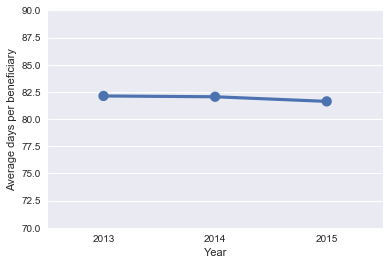

In [68]:
plot = sns.pointplot(x='year',y='opioid_days_per_bene', data=vermontsummary)
pylab.ylim([70,90])
plot.set(xlabel='Year', ylabel='Average days per beneficiary')
fig = plot.get_figure()

# fig.savefig("Vermontclaims20132015.pdf")

### Analyzing Vermont opioid prescription type data

Our overall prescription analyses can only tell us so much — because maintenance drugs are prescribed for a longer time than other drugs, we can't necessarily see the more nuanced changes in prescribing practices.

To get to this analysis, we used a dataset that breaks down each doctor's Medicare Part D prescriptions by drug. As this breaks the data into more subsets, we also end up with more beneficiary counts that come in under 11, and more suppressed data. The dataset also doesn't contain rows where doctors wrote fewer than 11 prescriptions for any drug, so we're also dealing with an unknown quantity of missing data for lower prescribers.

This analysis is conducted with a limited dataset, and we don't have enough information to say whether or not these trends hold true on the state level. See story (LINK HERE) for more on the data that is and is not available.

In [69]:
opioidsummary.head()

,year,generic_name,type,bene_count,total_claim_count,total_day_supply
0,2013,ACETAMINOPHEN WITH CODEINE,O,992.0,2617.0,41697.0
1,2013,BUPRENORPHINE,M,19.0,61.0,1366.0
2,2013,BUPRENORPHINE HCL,M,70.0,540.0,6374.0
3,2013,BUPRENORPHINE HCL/NALOXONE HCL,M,628.0,8030.0,98887.0
4,2013,BUTALBIT/ACETAMIN/CAFF/CODEINE,O,5.0,14.0,378.0


In [70]:
opioidtypesummary = opioidsummary.groupby(['year', 'type'], as_index=False).sum()
opioidtypesummary['days_per_bene'] = opioidtypesummary['total_day_supply']/opioidtypesummary['bene_count']
opioidtypesummary['claims_per_bene'] = opioidtypesummary['total_claim_count']/opioidtypesummary['bene_count']

opioidtypesummary

,year,type,bene_count,total_claim_count,total_day_supply,days_per_bene,claims_per_bene
0,2013,A,23922.0,92086.0,1864783.0,77.952638,3.849427
1,2013,M,1718.0,14232.0,244641.0,142.398719,8.284051
2,2013,O,7969.0,28554.0,635601.0,79.759192,3.583135
3,2014,A,24857.0,97684.0,1990667.0,80.084765,3.929839
4,2014,M,1844.0,15860.0,259986.0,140.990239,8.600868
5,2014,O,9057.0,30683.0,699037.0,77.181959,3.387766
6,2015,A,24227.0,95038.0,1978849.0,81.679490,3.922813
7,2015,M,1752.0,15757.0,252371.0,144.047374,8.993721
8,2015,O,9734.0,31492.0,716439.0,73.601705,3.235258


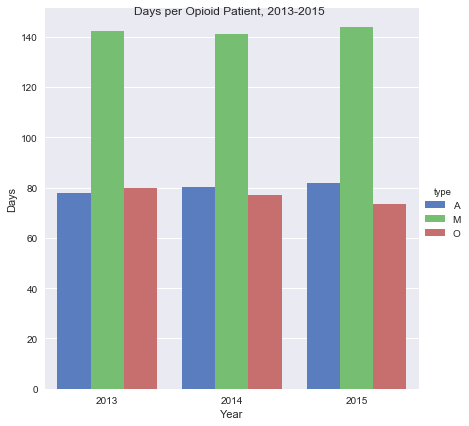

In [71]:
g = sns.factorplot(x="year", y="days_per_bene", hue="type", data=opioidtypesummary,
                   size=6, kind="bar", palette="muted")
g.set(xlabel='Year', ylabel='Days')
g.fig.suptitle("Days per Opioid Patient, 2013-2015")

# g.savefig("medicationtypedays1315.pdf")

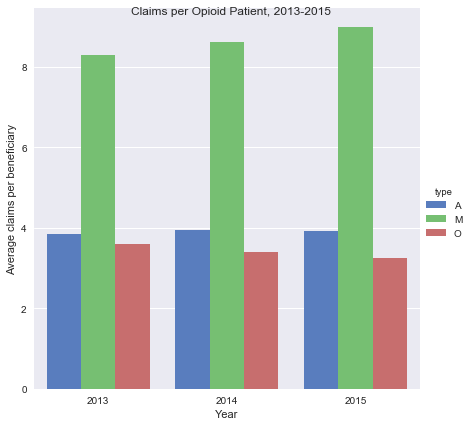

In [72]:
g = sns.factorplot(x="year", y="claims_per_bene", hue="type", data=opioidtypesummary,
                   size=6, kind="bar", palette="muted")
g.set(xlabel='Year', ylabel='Average claims per beneficiary')
g.fig.suptitle("Claims per Opioid Patient, 2013-2015")

g.savefig("medicationtypeclaims1315.pdf")